# Setup

Import data science stuff

In [1]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

Import Twitter API
1. Make a Twitter account
2. Go to https://developer.twitter.com/en and sign up for a dev account; you may have to get elevated access
3. Execute the code below (https://docs.tweepy.org/en/stable/getting_started.html is the documentation I'm using)

In [2]:
import tweepy

keys_path = 'keys.json'
with open(keys_path, "r") as f:
    keys = json.load(f)
    consumer_key = keys['consumer_key']
    consumer_secret = keys['consumer_secret']
    access_token = keys['access_token']
    access_token_secret = keys['access_token_secret']

auth = tweepy.OAuth1UserHandler(
   consumer_key, consumer_secret, access_token, access_token_secret
)
api = tweepy.API(auth)

# Get tweets

In [13]:
from pathlib import Path
import json

ds_tweets_save_path = "data/hasan_tweets.json"

# Only download the data once
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    hasan_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, screen_name="hasanthehun", 
                                             tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    hasan_tweets = json.load(f)

In [14]:
has_tweets = pd.DataFrame(hasan_tweets)
has_tweets.info()
has_tweets.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3216 non-null   object 
 1   id                         3216 non-null   int64  
 2   id_str                     3216 non-null   object 
 3   full_text                  3216 non-null   object 
 4   truncated                  3216 non-null   bool   
 5   display_text_range         3216 non-null   object 
 6   entities                   3216 non-null   object 
 7   extended_entities          843 non-null    object 
 8   source                     3216 non-null   object 
 9   in_reply_to_status_id      1132 non-null   float64
 10  in_reply_to_status_id_str  1132 non-null   object 
 11  in_reply_to_user_id        1132 non-null   float64
 12  in_reply_to_user_id_str    1132 non-null   object 
 13  in_reply_to_screen_name    1132 non-null   objec

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Thu Nov 17 21:14:38 +0000 2022,1593351934332674049,1593351934332674049,"GOP TRIES TO STOP GAY &amp; INTERRACIAL MARRIAGE, WORLD LEADERS SAY UKRAINE MISSILES ACCIDENTALLY HIT POLAND~ NANCY NO LONGER DEM LEADER!! STARBUCKS STRIKES AROUND THE NATION AND MORE! THEN ITS @Sykkuno DAY WHERE I PLAY MULTIVERSUS + VALO W SYK! https://t.co/OTlQIU6Ehj https:...",False,"[0, 269]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Sykkuno', 'name': 'Sykkuno', 'id': 430177205, 'id_str': '430177205', 'indices': [194, 202]}], 'urls': [{'url': 'https://t.co/OTlQIU6Ehj', 'expanded_url': 'http://WWW.TWITCH.TV/HASANABI', 'display_url': 'TWITCH...","{'media': [{'id': 1593351860923924480, 'id_str': '1593351860923924480', 'indices': [270, 293], 'media_url': 'http://pbs.twimg.com/media/Fhy5E1iUAAAQL_m.jpg', 'media_url_https': 'https://pbs.twimg.com/media/Fhy5E1iUAAAQL_m.jpg', 'url': 'https://t.co/fqgHTAyUPk', 'display_url':...","<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",NaN,...,1214,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Thu Nov 17 19:04:56 +0000 2022,1593319291939475456,1593319291939475456,RT @theh3podcast: The Leftovers Podcast with @hasanthehun is now LIVE🔴\n\nWatch here... https://t.co/I35bfzb9wt https://t.co/obc6Z1bIr6,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'theh3podcast', 'name': 'The H3 Podcast', 'id': 920452359800553472, 'id_str': '920452359800553472', 'indices': [3, 16]}, {'screen_name': 'hasanthehun', 'name': 'hasanabi', 'id': 326756275, 'id_str': '326756275'...","{'media': [{'id': 1593300014843011072, 'id_str': '1593300014843011072', 'indices': [110, 133], 'media_url': 'http://pbs.twimg.com/media/FhyJ6_1XoAAdGWC.jpg', 'media_url_https': 'https://pbs.twimg.com/media/FhyJ6_1XoAAdGWC.jpg', 'url': 'https://t.co/obc6Z1bIr6', 'display_url':...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,0,False,False,False,en,"{'created_at': 'Thu Nov 17 18:15:14 +0000 2022', 'id': 1593306785502400513, 'id_str': '1593306785502400513', 'full_text': 'The Leftovers Podcast with @hasanthehun is now LIVE🔴 Watch here... https://t.co/I35bfzb9wt https://t.co/obc6Z1bIr6', 'truncated': False, 'display_text_r...",NaN,NaN,NaN,NaN
2,Thu Nov 17 18:15:42 +0000 2022,1593306901000773634,1593306901000773634,@Myth_ it doesn’t,False,"[7, 17]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Myth_', 'name': 'Myth', 'id': 2163885564, 'id_str': '2163885564', 'indices': [0, 6]}], 'urls': []}",NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.593104e+18,...,2001,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: ylabel='favorite_count'>

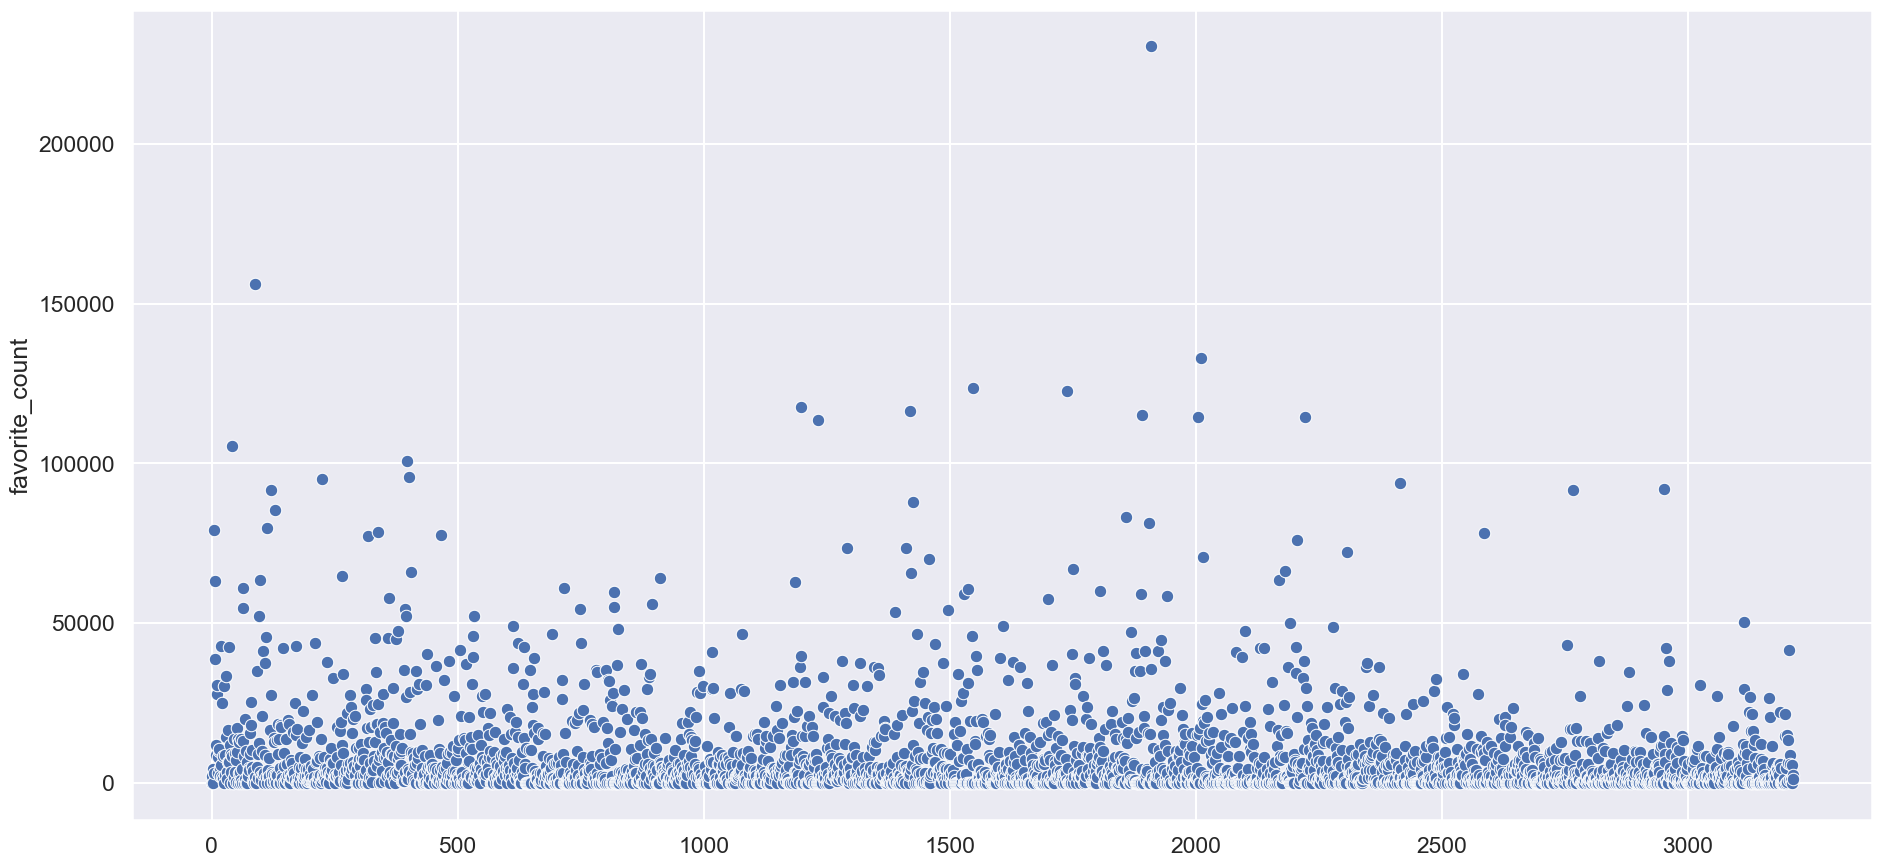

In [24]:
favs = has_tweets['favorite_count']
plt.figure(figsize=(20, 10))
sns.scatterplot(favs)